(chap:10-gdp)=
# 主なマクロ・データの特徴

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import japanize_matplotlib
import numpy as np
import pandas as pd
import py4macro

# numpy v1の表示を使用
np.set_printoptions(legacy='1.21')
# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

## はじめに

人の心の中を知ることはできない。友人，同僚，パートナー，親族もそうである。また何十年も連れ添った夫婦でさえも完全にお互いの心の中を分かっているとは言い難いだろう。しかし話し言葉やその内容，行動から心の中を推察することは可能である。実際，我々は日常そうしており，人間関係を豊かにする為には必須でる。経済も同じであり，経済の動きの裏にある「真のメカニズム」は完全に把握されていない。アダム・スミスの時代に比べると，「熟練夫婦」に匹敵するほどの知見は蓄積されたかも知れないが，今でも「真のメカニズム」が100％解明されたとは言い難い。経済学者にとってできることは，経済の「言動」であるデータを観察し「真のメカニズム」について想像を巡らすことである。人の言動に注意を払わずに人の心の中を想像するのは「妄想」となり，データを無視して経済を考えるのは「空想」となってしまう危険性がある。
> 人の心の中　$\Longleftrightarrow$　経済の真のメカニズム
>
> 人の言動　$\Longleftrightarrow$　経済データ

この章はマクロ・データの特徴を理解することを目的とする。統計量やプロットを駆使して異なるマクロ・データの特性を炙り出し，経済の「言動」に注目しようということである。特に，以下では国内総生産（GDP），その構成要素，インフレ率と失業率に着目し議論を進める。

使うデータは`py4macro`に含まれる日本の四半期データであり，1980年から1993年のデータと1994年以降の２つのデータ・セットを組み合わせて作成してある。データを読み込むには次のようにする。
```
py4macro.data('jpn-q')
```
ここで`jpn`はJapan，`q`はquerterを表している。`description=True`の引数を追加すると変数の定義が表示される。

In [2]:
py4macro.data('jpn-q', description=True)


    | `gdp`:         国内総生産（GDP）
    | `consumption`: 消費
    | `investment`:  投資
    | `government`:  政府支出
    | `exports`:     輸出
    | `imports`:     輸入
    | `capital`:     資本ストック
    | `employed`:    就業者数
    | `unemployed`:  失業者数
    | `unemployment_rate`: 失業率
    | `hours`:       労働者一人当たり月平均労働時間
    | `total_hours`: 月平均総労働時間（`employed`X`hours`）
    | `inflation`:   インフレ率
    | `price`:       消費者物価指数
    | `deflator`:    GDPデフレーター
    |
    | * 四半期データ
    |
    | ＜出典＞
    | GDPと各需要項目
    |    * 1994年Q1~2023年Q4
    |        * 実額・四半期・実質季節調整系列（年換算）
    |        * 2015暦年（平成27年）連鎖価格
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |    * 1980年Q1~1993年Q4
    |        * 実額・四半期・実質季節調整系列（年換算）
    |        * 平成27年基準支出側GDP系列簡易遡及（参考系列であり上のデータと接続可能）
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |
    | 実質資本ストック
    |   * 1994年Q1~2023年Q4
    |        * 平成25年基準
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |   * 1980年Q1~1993年Q4
    |        * 平成25年基準遡及系列
    |        *

このデータ・セットにはGDP，その構成要素，インフレ率と失業率以外も含まれているが，それらは次章以降で使うことになる。

まずデータを読み込んで最初の`5`行を表示してみよう。

In [3]:
df = py4macro.data('jpn-q')
df.head()

,gdp,consumption,investment,government,exports,imports,capital,employed,unemployed,unemployment_rate,hours,total_hours,inflation,price,deflator
,,,,,,,,,,,,,,,
1980-01-01,269747.5,153290.7,65029.2,73039.5,18383.8,24278.8,834219.7,5506.000000,107.666667,1.900000,124.7,686598.200000,5.766667,NaN,91.2
1980-04-01,268521.8,153551.9,65316.6,72164.5,18631.4,25454.5,843000.2,5525.666667,110.000000,1.966667,124.8,689603.200000,8.166667,72.917251,93.4
1980-07-01,274183.1,155580.0,65765.9,72663.8,18449.3,23885.7,854753.4,5561.333333,116.000000,2.033333,124.0,689605.333333,8.200000,73.897654,94.4
1980-10-01,279601.8,156162.4,66017.5,74761.1,19705.4,23716.5,868241.2,5551.333333,123.333333,2.166667,124.0,688365.333333,8.100000,74.767147,95.4
1981-01-01,281995.7,156757.7,66259.0,76127.6,20289.5,24174.1,879629.9,5568.666667,124.333333,2.200000,123.6,688287.200000,6.833333,75.690241,95.6


列には変数が並んでいるのが確認できる。行は行番号ではなく行ラベルとなっており，年・四半期を示している。`1980`年であれば、次のような行ラベルになっており、各四半期の最初の日がラベルとして使われている。
* `1980-01-01`：第`1`四半期
* `1980-04-01`：第`2`四半期
* `1980-07-01`：第`3`四半期
* `1980-10-01`：第`4`四半期

`.info()`を使って確認してみる。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 1980-01-01 to 2023-10-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gdp                176 non-null    float64
 1   consumption        176 non-null    float64
 2   investment         176 non-null    float64
 3   government         176 non-null    float64
 4   exports            176 non-null    float64
 5   imports            176 non-null    float64
 6   capital            176 non-null    float64
 7   employed           176 non-null    float64
 8   unemployed         176 non-null    float64
 9   unemployment_rate  176 non-null    float64
 10  hours              176 non-null    float64
 11  total_hours        176 non-null    float64
 12  inflation          176 non-null    float64
 13  price              175 non-null    float64
 14  deflator           176 non-null    float64
dtypes: float64(15)
memory usage: 22.0 KB


表示の上から２行目に`DatetimeIndex`とあるが，行ラベルのことを表しており，時系列データ用となっている。具体的な説明は割愛するが，時系列データが扱いやすくなりプロットする際にも便利である。

````{note}
`jpn-q`に含まれる実質GDPと各需要項目は「連鎖価格」となっている。詳細な説明は[内閣府の資料](https://www.esri.cao.go.jp/jp/sna/data/data_list/sokuhou/files/old_keisu/pdf/shiryou_rensa.pdf)を参考にするとして、この実質化の手法により「加法整合性の不成立」と呼ばれる問題が発生する。GDPは３面等価の原則により生産側、分配側、支出側で測ったGDPは等しいが、`jpn-q`には支出側GDPのデータが含まれており、参照年とその翌年以外は、次の問題が内在している。

$$
\text{支出側GDP}\;\neq\;\text{消費＋投資＋政府支出＋輸出ー輸入}
$$

左辺と右辺（需要項目の合計）は等しくないという意味で「加法整合性の不成立」が発生している。その差は「開差」という項目で内閣府のデータに含まれており、連鎖価格の実質GDPは水準よりも変化率の分析に適していると言われている。では、どれ程の差があるのだろうか。開差の絶対値の平均は公式系列の1994Q1〜2023年Q4のデータでは平均で約`0.6`％（対GDP比）、参考系列の1980〜1993年で約`3.2`％（対GDP比）となっている。驚く程の大きさではないかも知れないが、以下ではこの問題を念頭に置きつつ需要項目の割合などの議論を進めることにする。
````

```{warning}
`jpn-q`に含まれるGDPとその構成要素の四半期データは実質季節調整系列である。これとは別に，内閣府のサイトには原系列データも公表されている。大まかには，2つの系列は次のような関係がある。まず，原系列データに季節調整をおこない，季節的な影響などを取り除く。その後、4倍にし年率加算すると季節調整系列となる。従って，4四半期の原系列データの合計は1年間のデータとなるが，季節調整系列はその約4倍になる。注意しよう！
```

## GDPとその変化

まずGDPを図示しよう。

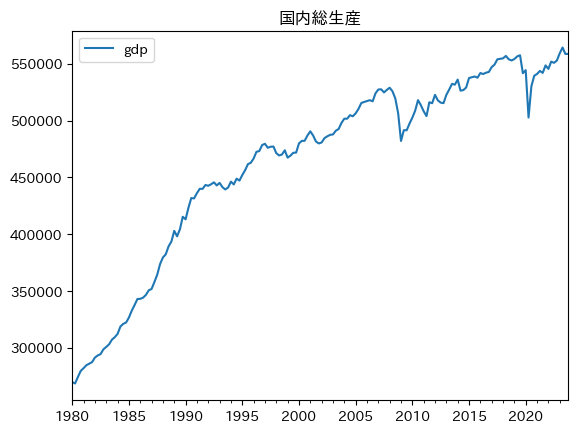

In [5]:
df.plot(y='gdp', title='国内総生産')
pass

長期的には上昇トレンドであることが分かる。これが経済成長である。一方で，よく観察するとギザギザに動いていることも確認できる。景気変動である。小さい上下の動きもあれば，より大きな動きもある。例えば，2008年のリーマン・ショック，そして2020年のコロナ禍の影響でGDPは大きく下落している。

> (問４）なぜ景気変動は起こるのか？

これがマクロ経済学のもう一つのBig Questionである。この章以降は問４を中心にマクロ経済を考察することになる。

上の図には最新のデータは含まれていないかも知れない。参考に最新のデータを含む図を下にに表示する。

In [6]:
from IPython.display import IFrame
IFrame(src='https://fred.stlouisfed.org/graph/graph-landing.php?g=BOLN&width=420&height=320',
       width=450, height=330)

この図は[米国セントルイス連邦準備銀行が管理するFederal Reserve Economic Data (FRED)](https://fred.stlouisfed.org)と呼ばれるデータ・ベースからライブでダウンロードして表示している。

`py4macro`を使った上の図もしくはFREDの図にあるGDPは水準を表しているため，GDPの成長率を直接読み取り異なる時期の成長率を比べることは難しい。しかし，それを可能にするのが対数化したGDPのプロットである。まず，なぜそうなのかを簡単に説明しよう。

変数`x`の成長率$g_x$は次の式で定義される。

$$
1+g_x=\frac{x_{t+1}}{x_{t}}
$$

ここで$g_x$の値は，例えば`0.02`（`2％`）のような値となる。この式の両辺に対数を取り，近似を使うと次のように書き直すことができる。

$$
\begin{aligned}
\log(1+g_x)&=\log(x_{t+1})-\log(x_{t})\\
&\Downarrow\text{左辺を近似}\;\log(1+g_x)\approx g_x\\
g_x&\approx\log(x_{t+1})-\log(x_{t})
\end{aligned}
$$ (eq:10-log-growth)

`x`の成長率である$g_x$は，`x`の対数の差分ということになる。即ち，縦軸に`x`の対数，横軸に時間をおけば，プロットの傾きは`x`の成長率と等しいことになる。

この特徴は、`1`期（ここでは`1`四半期）のみに有効なことではなく、`2`期以上を考える場合も有効である。`n`期間における平均成長率を$g_x$と置くと次式が成立する。

$$
(1+g_x)^n=\frac{x_{t+n}}{x_{t}}
$$

両辺に対数を取り，近似を使うと次のように書き直すことができる。

$$
\begin{aligned}
n\log(1+g_x)&=\log(x_{t+n})-\log(x_{t})\\
&\Downarrow\\
g_x&\approx\frac{\log(x_{t+n})-\log(x_{t})}{n}
\end{aligned}
$$

右辺は`n`期間の平均成長率となる。従って、縦軸に`x`の対数がある場合、複数期間にまたがって直線を書いた場合、その傾きが平均成長率と等しい事になる。

では実際にプロットしよう。

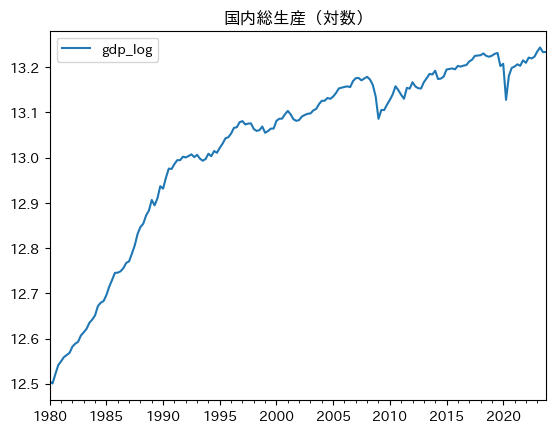

In [7]:
df['gdp_log'] = np.log( df['gdp'] )

df.plot(y='gdp_log', title='国内総生産（対数）')
pass

プロットの傾きは四半期ごとのGDPの成長率であり，成長率が変化しているのがわかる。また，2008年のリーマン・ショックとコロナ禍により成長率が大きく下落していることが確認できる。景気循環により成長率が小刻みに，また時には大きく変化している。

次に，長期的な視点で図を眺めてみよう。1980年から1990年までの間に直線のトレンドを描くことができる。その傾きが平均成長率である。同様に，1990年から2020年までの直線トレンドを描くこともできるが，傾きが緩やかになっていることに気づくのではないだろうか。1991年頃のバブル崩壊の影響により，その後のGDPの伸びが鈍化していることがわかる。「失われた10年」，「失われた20年」と言われていたが，今では「失われた30年」と言われる所以である。

次に[式](eq:10-log-growth)を使い四半期成長率を計算してみよう。

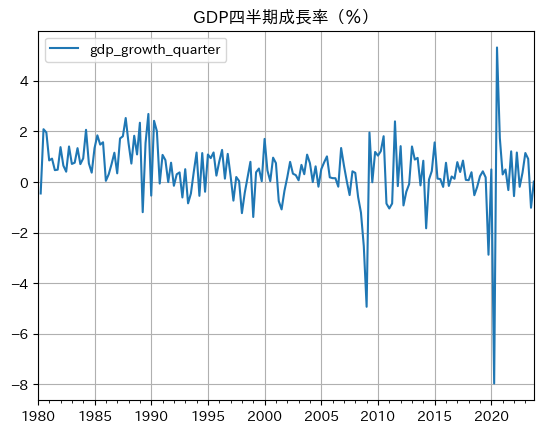

In [8]:
df['gdp_growth_quarter'] = 100 * df['gdp_log'].diff()   # 1

df.plot(y='gdp_growth_quarter',
        title='GDP四半期成長率（％）',
        grid=True)                    # 2
pass

````{admonition} コードの説明 🐍
:class: code-explanation, dropdown
1. `.diff()`は差分を計算するメソッドであり，引数の数（デフォルトは`1`）は何期前の値と差分を計算するかを指定する。
2. 引数`grid=True`はグリッド線を表示する。
    * `Pandas`のメソッド`plot`は図を表示し，同時に図の「軸（axis）」を返すが，次のコードのように、そのメソッド`.grid()`を使っても同じ表示となる。
```
ax_ = df.plot(y='gdp_growth_quarter', title='GDP四半期成長率（％）')
ax_.grid()
```
````

新聞などで「前年同期比成長率」という表現をみたことがあると思うが，`diff()`の引数を`4`にすることにより，前年同期比の成長率を計算することができる。それを図示してみよう。

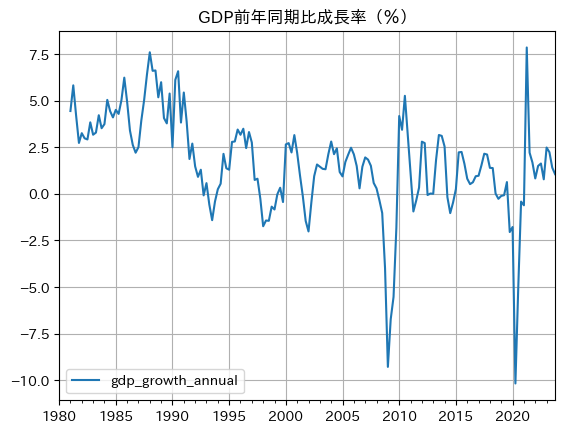

In [9]:
df['gdp_growth_annual'] =  100 * df['gdp_log'].diff(4)

df.plot(y='gdp_growth_annual',
        title='GDP前年同期比成長率（％）',
        grid=True)
pass

上の図と比べると次の特徴がある。
* 縦軸の幅が違う。１四半期と４四半期（１年）の成長率の違いが反映されている。
* 四半期データの変動は短期的な変化を追うには適している。しかし，変動が激しいため、長期的な成長率の予測には不向きだろう。一方、前年同期比のデータは，景気の基調を捉えるのに適していると言われている。
* データには季節性があり，前年同期比成長率は季節調整されていないデータに使われることが多い。（ちなみに，`df`に含まれる`gdp`のデータは季節調整済みである。）

最高値と最小値を計算してみよう。

In [10]:
df['gdp_growth_annual'].max(), df['gdp_growth_annual'].min()

(7.84950729916023, -10.174721491547523)

1980年代後半ののバブル景気には約`7.8`％増加しているが，コロナ禍では約`10`％以上下落している。

```{hint}
次の点を知っておくのも有用だろう。
* 次の式を使うと四半期成長率を年率換算することもできる。

    $$
    g_{\text{年率換算成長率}}=\left(1+g_{\text{四半期成長率}}\right)^4-1
    $$

    $g_{\text{四半期成長率}}$は４期続くことを想定した成長率である。
    
* 年次データを使うとGDPの値は均されるので変化率は低めに出る。
```

## GDPの構成要素

次式は所得恒等式である。
```
    GDP=消費＋投資＋政府支出＋純貿易（輸出ー輸入）
```
GDPに対してそれぞれ構成要素は何％を占め，どのように推移したかを図示する為に，まず変数を計算する。

In [11]:
# 消費の割合
con_gdp_ratio = 100 * df['consumption'] / df['gdp']

# 投資の割合
inv_gdp_ratio = 100 * df['investment'] / df['gdp']

# 政府支出の割合
gov_gdp_ratio = 100 * df['government'] / df['gdp']

# 純輸出の割合
net_exp_gdp_ratio = 100 * ( df['exports']-df['imports'] ) / df['gdp']

それぞれの平均を`for`ループで計算し表示してみよう。

In [12]:
ratio_lst = [con_gdp_ratio, inv_gdp_ratio,
             gov_gdp_ratio, net_exp_gdp_ratio]

label_lst = ['Consumption', 'Investment', 'Gov Exp', 'Net Exports']

for r, l in zip(ratio_lst, label_lst):
    
    avr = r.mean()
    
    print(l, f'\t{avr:.1f}')

Consumption 	55.5
Investment 	21.7
Gov Exp 	25.3
Net Exports 	-1.1


消費はGDPの`50`％以上あり，GDPの約1/4が政府支出となっている。消費とは対照的に，投資は`20`％程であり消費の約半分以下である。（小数点第一位までしか表示していないため合計は100にならない。）

次に推移を確認する。同じように`for`ループを使うと簡単に表示できる。

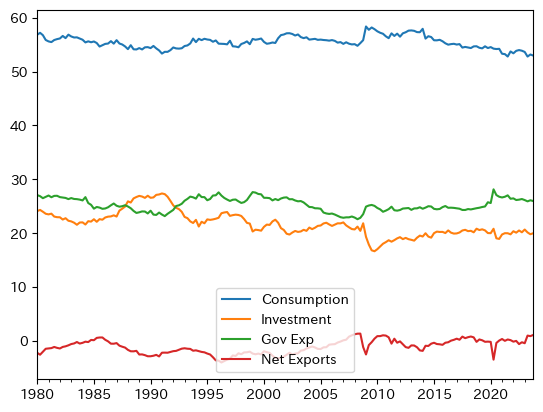

In [13]:
for r, l in zip(ratio_lst, label_lst):
    
    r.plot(label=l, legend=True)

````{admonition} コードの説明
:class: dropdown

* `zip()`について説明する。`zip()`はループによく使われる便利な関数である。以下の単純な`for`ループ
    ```
    for r in ratio_lst:
        r.plot()
    ```
    にはループ用の変数が`r`の１種類しかない。これでも図示することは可能である。しかし凡例を追加するためには`label_lst`も`for`ループの中で同時に使う必要がある。そのような場合に便利な関数が`zip()`である。引数に`ratio_lst`と`label_lst`を入れると，同時に順番に要素にアクセスできる。それぞれの要素を割り当てる変数として`r`と`l`を使っている。`r`と`l`の間に`,`を入れることにより，それぞれ別のリストの要素を捉えることができる。
* この`for`ループは以下と等しい。
    ```
    con_gdp_ratio.plot(label='Consumption', legend=True)
    inv_gdp_ratio.plot(label='Investment', legend=True)
    gov_gdp_ratio.plot(label='Gov Exp', legend=True)
    net_exp_gdp_ratio.plot(label='Net Exports', legend=True)
    ```
    もちろんこれでも良いが，コードを書く際は極力同じような行を繰り返すのではなくループを使ってまとめる方が良い。第一の理由は，簡単なエラーの可能性を軽減することができることだ。リピートして書く場合，1行をコピペしその後に1行ずつ修正をするパターンが多いが，最初の１行目が間違っている場合，全ての行を修正する必要が発生する。その際に修正し忘れることがある。第二の理由は，コードの修正も簡単になるためである。例えば，`linewidth=2`を設定したいとしよう。`for`ループの場合は一箇所に加えるだけで済むことになる。
````

景気の動向によって上下することがわかる。例えば，リマン・ショック後には投資が大きく下落し少しずつしか上昇しない。一方，景気悪化に反応し政府支出の割合は上昇している。またバブル景気（1986年から1991年まで）ではその逆が起こっており，順位が逆転する程である。コロナ禍の影響もプロットにハッキリと現れている。

## 失業率とインフレ率

次に失業率とインフレ率のデータをプロットしてみよう。

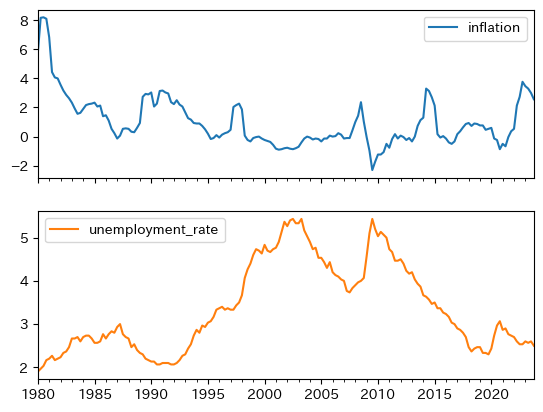

In [14]:
infu_lst = ['inflation', 'unemployment_rate']

df.plot(y=infu_lst, subplots=True)
pass

インフレ率（年率）は，バブル崩壊後は`4`％以下の低い率をキープし、デフレに陥った期間も長く続いた。

失業率に関して述べると、1995年頃から2015年頃の約`20`年間は、その前後と比較して高い値になっている。
2002年第3四半期の一つ目のピークは`5.43`％であり、バブル崩壊の影響によるものである。就職氷河期と呼ばれる期間である。
2009年第3四半期の二つ目のピークはリーマンショックによる影響であり、同じ`5.43`％である。
2020年第4四半期にも`3.07`％のピークがあるが、コロナ感染症に端を発している。
バブル崩壊による失業率の上昇は比較的にじわじわと動いているが、リーマンショックとコロナショックによる影響は失業率の急上昇として現れている。

少し複雑になるが、`for`ループを使い、`10`年毎の平均失業率を計算し、上の失業率の図に重ねてプロットしてみよう。
まず再度`df`にある`unemployment_rate`を確認しよう。

In [15]:
df[['unemployment_rate']].head()

,unemployment_rate
,
1980-01-01,1.900000
1980-04-01,1.966667
1980-07-01,2.033333
1980-10-01,2.166667
1981-01-01,2.200000


行ラベルを使い`unemployment_rate`の値にアクセスできるが、行インデックスを使うことも可能である。
例えば、次のコードは最初の行を`Series`として抽出している。

In [16]:
df[['unemployment_rate']].iloc[0,:]

unemployment_rate    1.9
Name: 1980-01-01 00:00:00, dtype: float64

このように以下では、行インデックス番号を使い各`10`年間の平均を計算する。
`1`年間には`4`四半期があるのため、`10`年間には`40`四半期ある。
従って、最初の行のインデックスは`0`なため、各`10`年間の最初の四半期は次のコードで捉えることができる。

In [17]:
start_decade = range(0, len(df), 40)

list(start_decade)

[0, 40, 80, 120, 160]

この結果を使い、次のコードで平均失業率を計算することができる。

In [18]:
#1
u_idx = df.columns.tolist().index('unemployment_rate')

#2
u_lst = []

for start in start_decade:

    #3
    u_avr = df.iloc[start:start+40, u_idx].mean()
    #4
    u_lst.append(u_avr)

u_lst

[2.495, 3.041666666666667, 4.654166666666667, 3.565, 2.6937499999999996]

このリストの最初の値が`1980`年代の平均失業率であり、最後の値が`2020`年代の平均失業率となる。

```{admonition} コードの説明
:class: dropdown

* `#1`：右辺では列`unemployment_rate`の列インデックスを抽出し、左辺の変数`u_idx`に割り当てている。右辺では、まず`df.columns`で列ラベルを抽出し、`.tolist()`を使いリストに変換している。これで、列ラベルが要素となるリストが作成される。そのリストのメソッド`.index()`を使うと、リストに含まれる要素のインデックス番号を抽出することができる。ここでは`unemployment_rate`のインデックス番号を抽出している。
* `#2`：平均失業率を格納する空のリスト
* `#3`：`df.iloc[]`を使い、各`10`年間の失業率を抽出し、`.mean()`を使い、その平均を計算している。`+40`は`10`年に含まれる四半期の数を表している。
* `#4`：`#3`で計算した平均失業率を`u_lst`に追加している。
```

次に図示して確かめてみよう。

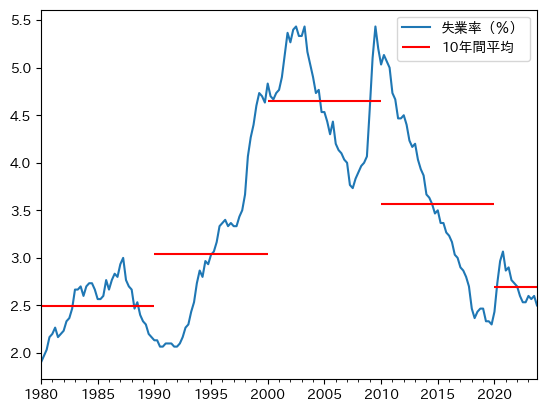

In [19]:
ax = df.plot(y='unemployment_rate',       #1
             label='失業率（％）')          #2

for i, start in enumerate( start_decade[:-1] ): #3
    
    ax.hlines(u_lst[i],                   #4
              xmin=df.index[start],       #5
              xmax=df.index[start+40],    #6
              color='red')                #7

start = start_decade[-1]                  #8

ax.hlines(u_lst[-1],                      #9
          xmin=df.index[start],           #10
          xmax=df.index[-1],              #11
          color='red',                    #12
          label='10年間平均')              #13

ax.legend()                               #14
pass

```{admonition} コードの説明
:class: dropdown

* `#1`：上の図と同じ`unemployment_rate`のプロットを表示するが、それと同時に軸を`ax`に割り当てる。
* `#2`：凡例の表示を設定する。
* `#3`：`start_decade`の最後の要素以外で`for`ループを実行する。また`enumerate()`関数を使い、`start_decade`の要素のインデックス番号を`i`に割り当て、要素は`start`に割り当てる。
* `#4`：`ax`のメソッド`.hlines()`を使って、赤い横線を表示する。`u_lst[i]`は横線を引く縦軸の値。
* `#5`：`xmin`は横線の始点を指定する引数。`df.index[start]`を使い、各`10`年間の最初の行を指定している。
* `#6`：`xmax`は横線の終点を指定する引数。`df.index[start+40]`を使い、各`10`年間の最後の行を指定している。
* `#7`：横線の色を赤に設定する。
* `#8`：`2020`年代には`40`の四半期がないので別に図示する。`2020`年代の最初の行インデックスを`start`に割り当てる。
* `#9`：`#4`と同じ。
* `#10`：`#5`と同じ。
* `#11`：`#6`と同じにすると、`2020`年代には`40`の四半期がないのでエラーが発生する。エラーを避けるために、`df.index[-1]`は最後の行インデックスを抽出している。
* `#12`：`#7`と同じ。
* `#13`：`#2`と同じ。
* `#14`：凡例を表示する。
```

1990年頃から2020年頃の間に、ピークが`2`つある大きな山がそびえ立っている。
一方、その両端の平均成長率は約`2.5`％である。
ここから見えてくるのは、一つのストーリー（考え方、もしくは仮説）である。
`2.5`％程度が長期的な失業率とすると、バブル崩壊とリーマンショックの`2`大ショックにより、長期的均衡から大きく`2`倍以上の値に乖離し、`20`年以上掛けてかけてゆっくりとしたペースで労働市場での大規模な「調整」が発生したようである。
それは`10`年間の平均失業率にもはっきりと現れている。
平均成長率の階段を上り、そして下りる日本経済である。

## トレンドと変動

### 説明

上の分析から明らかなことは，マクロ変数は変動するということであり，正しくそれが景気循環を表している。
ここでは景気循環について，もう一歩踏み込んで考えてみる。

マクロ変数はトレンドと変動（サイクル）に分解することができる。その方法は２つあり、マクロ変数の性質によって次のように使い分ける。
* GDPのように長期的なトレンドが右上がりの変数の場合、次式のように２つの項の掛け算で表す。

    $$
    Y_t=Y_t^{\text{trend}}\times Y_t^{\text{cycle}}
    $$ (eq:10-decompose)

* 失業率のように右上がりのトレンドがない場合（自然失業率が一定であればトレンドはないことになる）、次式のように２つの項の足し算で表す。

    $$
    u_t=u_t^{\text{trend}}+u_t^{\text{cycle}}
    $$ (eq:10-decompose_plus)

ここで$Y_t^{\text{trend}}$と$u_t^{\text{trend}}$は各変数の長期的な傾向や値を表し、$Y_t^{\text{cycle}}$と$u_t^{\text{cycle}}$は短期的な変動を捉えている。

内閣府は景気循環を「山」と「谷」の２つに分けて[景気基準日付](https://www.esri.cao.go.jp/jp/stat/di/hiduke.html)を発表している。イメージ的には、GDPがトレンドを上回っている期間を「山」，下回っている期間を「谷」と考えて良いだろう。図示すると次のようになる。

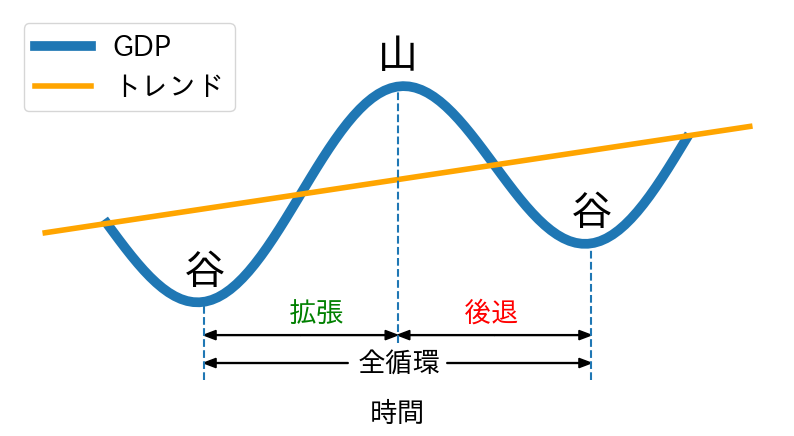

In [20]:
def trend_cycle():
    
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    
    # フォントのサイズ
    font_largest=30
    font_large=20

    # GDPのプロット
    xlow = 0
    xhigh = 3*np.pi
    x = np.arange(xlow, xhigh, 0.1)

    def yfunc(x):
        return np.cos(x+np.pi/2)+0.1*x

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, yfunc(x), linewidth=7, label='GDP')

    # トレンド線のプロット
    xx = np.linspace(xlow-1., xhigh+1)

    def trend_line(x):
        return ( yfunc(3*np.pi)-yfunc(0) )/(3*np.pi) * (x-0)+yfunc(0)

    ax.plot(xx, trend_line(xx), lw=4, color='orange', label='トレンド')

    # 縦点線のプロット
    ylow = -1.68
    
    tani0 = mlines.Line2D([np.pi/2, np.pi/2], [ylow, yfunc(np.pi/2)],  linestyle='--')
    yama = mlines.Line2D([np.pi*3/2, np.pi*3/2], [ylow+0.4, yfunc(np.pi*3/2)],  linestyle='--')
    tani1 = mlines.Line2D([np.pi*5/2, np.pi*5/2], [ylow, yfunc(np.pi*5/2)],  linestyle='--')
    
    ax.add_line(tani0)
    ax.add_line(yama)
    ax.add_line(tani1)

    # 矢印のプロット（拡張と後退）
    for dx in [np.pi/2, -np.pi/2]:
        ax.arrow(x=np.pi, y=-1.2, dx=dx, dy=0,
                 width=0.01, head_width=0.1,head_length=0.2,
                 length_includes_head=True,color='k')

    for dx in [np.pi/2, -np.pi/2]:
        ax.arrow(x=2*np.pi, y=-1.2, dx=dx, dy=0,
                 width=0.01, head_width=0.1,head_length=0.2,
                 length_includes_head=True,color='k')

    # 矢印のプロット（全循環）
    start_arrow_shift = 0.8
    ax.arrow(x=np.pi*3/2-start_arrow_shift, y=-1.5,
             dx=-(np.pi-start_arrow_shift), dy=0,
             width=0.01, head_width=0.1,head_length=0.2,
             length_includes_head=True,color='k')
    ax.arrow(x=np.pi*3/2+start_arrow_shift, y=-1.5,
             dx=np.pi-start_arrow_shift, dy=0,
             width=0.01, head_width=0.1,head_length=0.2,
             length_includes_head=True,color='k')

    # 注釈の挿入
    x0 = np.pi/2
    x1 = np.pi*3/2
    x2 = np.pi*5/2
    xshift = 0.33
    yshift = 0.2

    ax.annotate('谷', xy=(x0-xshift, yfunc(x0)+yshift),size=font_largest)
    ax.annotate('山', xy=(x1-xshift, yfunc(x1)+yshift), annotation_clip=False, size=font_largest)
    ax.annotate('谷', xy=(x2-xshift, yfunc(x2)+yshift),size=font_largest)

#     ax.annotate('好況', xy=(xlow-1.1,0.2), annotation_clip=False, size=font_large, color='green')
#     ax.annotate('不況', xy=(xlow-1.1,-0.5), annotation_clip=False, size=font_large, color='red')
#     ax.annotate('好況', xy=(xhigh+0.3,1.25), annotation_clip=False, size=font_large, color='green')
#     ax.annotate('不況', xy=(xhigh+0.3,0.55), annotation_clip=False, size=font_large, color='red')

    ax.annotate('拡張', xy=(np.pi-0.2,-1.05), size=font_large, color='green')
    ax.annotate('後退', xy=(2*np.pi-0.5,-1.05), size=font_large, color='red')
    ax.annotate('全循環', xy=(np.pi*3/2-0.65,-1.6), size=font_large)

    # 横軸のラベル，凡例を追加，縦軸の表示範囲の設定
    ax.set_xlabel('時間', size=font_large)
    ax.legend(loc='upper left', fontsize=20)
    ax.set_ylim(ymax=2.3)

    # 縦軸・横軸のラベルと目盛の削除
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

    # 枠を削除
    for s in ['top', 'right', 'left','bottom']:
        ax.spines[s].set_visible(False)

trend_cycle()

この図から，拡張・後退はGDPの変化を捉えていることが分かる。また，このプロットは`NumPy`のコサイン関数を使って描画しているので，「谷」と「山」が発生した時期を簡単に見分けることができる。しかし，上のGDPデータのプロットを見直すと，「谷」と「山」がいつだったかを決めるのは簡単な問題ではないと想像できるだろう。実際，内閣府は単にGDPのデータを眺めるだけではなく[景気動向指数](https://www.esri.cao.go.jp/jp/stat/di/menu_di.html)を含め様々なデータに基づき，「谷」と「山」の時期を確定している。

景気循環を考える上で重要な役割を果たすのがトレンドである。トレンドはどのように計算するのだろうか。実は，決まった計算方法があるわけではなく，いろいろな考え方がある。実際，内閣府と日本銀行は独自の方法でGDPトレンドを算出している。
* [内閣府のデータ](https://www5.cao.go.jp/keizai3/getsurei/getsurei-index.html#sonota)
    * 「潜在GDP」がトレンドに対応しており，「GDPギャップ」はトレンドからの％乖離を表している。
* [日本銀行のデータ](https://www.boj.or.jp/research/research_data/gap/index.htm/)
    * 「潜在成長率」はトレンドの成長率に対応しており，「需給ギャップ」がトレンドからの％乖離を表している。

いずれにしろ，どのようにトレンドを決めたとしても，景気循環が人々の厚生に大きな影響を及ぼすことには変わりはない。不況は失業や様々な社会問題（例えば，犯罪や自殺）につながる。好況でも問題が無いわけではない。例えば，高いインフレが発生し資産価値（例えば，貨幣）が暴落し通常の生活に支障が出ることもある。またバブル景気が示すように「山」は次の「谷」の芽を育む期間となりえる。

### トレンドの計算方法

以下では，データを使い景気循環$Y_t^{\text{cycle}}$と$u_t^{\text{cycle}}$の特徴を調べるが，まず上の式[](eq:10-decompose)を考えてみよう。この場合、対数化し次式に書き換える。

$$
y_t^{\text{cycle}}=y_t-y_t^{\text{trend}}
$$ (eq:10-decompose_log)

ここで小文字は大文字の変数を対数化した値である
* $y_t\equiv\log(Y_t)$
* $y_t^{\text{cycle}}\equiv\log(Y_t^{\text{cycle}})$
* $y_t^{\text{trend}}\equiv\log(Y_t^{\text{trend}})$

$y_t^{\text{cycle}}$をより直感的に解釈するために式[](eq:10-decompose_log)の右辺を次のように近似しよう。

$$
y_t^{\text{cycle}}
=\log\left(\frac{Y_t}{Y_t^{\text{trend}}}\right)
    \approx
    \dfrac{Y_t}{Y_t^{\text{trend}}}-1
    =\dfrac{Y_t-Y_t^{\text{trend}}}{Y_t^{\text{trend}}}
$$ (eq:10-decompose_log_approx)

この式から次のことが言える。
* $y_t^{\text{cycle}}$は変数$Y_t$のトレンドからの乖離の割合を表している。
* $100\times y_t^{\text{cycle}}$は変数$Y_t$のトレンドからの％乖離を表している。

次に、式[](eq:10-decompose_plus)を考えるが、$u_t$の変動は次式で与えられる。

$$
u_t^{\text{cycle}}=u_t-u_t^{\text{trend}}
$$ (eq:10-decompose_plus_A)

そのまま解釈すれば良いが、呼称に注意する必要がある。
* トレンドからの乖離$u_t^{\text{cycle}}$の単位は％だが、％が単位となる変数の**差**として計算されているため「％ポイント」と呼ぶ。$100\times\left(\dfrac{u_t}{u_t^{\text{trend}}}-1\right)$として計算された％と区別するための呼称である。

ここまでの説明から，景気循環を捉える項$y_t^{\text{cycle}}$と$u_t^{\text{cycle}}$は変数の値とトレンドとの残差によって決まることがわかる。換言すると，景気循環の特徴はトレンドをどのように考えるかに依存しており，トレンドの算出方法をどうするか決めるかが重要なポイントとなる。ここでは，内閣府や日本銀行の複雑な手法ではなく，マクロ経済学研究でスタンダードなツールとなっている[Hodrick–Prescottフィルター](https://www.google.co.jp/search?q=Hodrick%E2%80%93Prescott%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF%E3%83%BC)と呼ばれる手法を使うことにする。詳細についての説明は控え，単に`py4macro`に含まれる関数`trend`を使ってトレンド抽出を行うことにする。使い方は次のコードで確認できる。

In [21]:
help(py4macro.trend)

Help on function trend in module py4macro.py4macro:

trend(s, lamb=1600)
    |
    | 引数:
    |     s: Seriesもしくは１列のDataFrameとし，行のラベルはDatetimeIndexとすること。
    |     lamb: 四半期用のデータでは通常の値（デフォルト：1600）
    |
    | 返り値:
    |     Hodrick-Prescott filterで計算したtrend（トレンド）のSeries
    |
    | 例: py4macro.trend(df.loc[:,'gdp'])



使い方は簡単で，トレンドを計算したい変数の`Series`もしくは１列の`DataFrame`を引数に設定し実行するとトレンドが返される。ただ，上でも説明した通り、HPフィルターは線形トレンドが仮定されているため，次の点に注意すること。
* GDPや消費の様に長期的に増加している変数は対数化し，`.trend()`関数の引数に使うこと。次式は式[](eq:10-decompose_log)の再掲。

    $$
    y_t^{\text{cycle}}=y_t-y_t^{\text{trend}}
    $$

* 失業率やインフレ率の様に長期的にはトレンドがない変数は，そのまま`.trend()`関数の引数に使うこと。次式は式[](eq:10-decompose_plus_A)の再掲。

    $$
    u_t^{\text{cycle}}=u_t-u_t^{\text{trend}}
    $$

### GDPのトレンドからの乖離率

まずGDPとその構成要素を対数化した変数とそのトレンドを計算し`df`に追加しよう。

In [22]:
gdp_lst = ['gdp',
           'consumption',
           'investment',
           'government',
           'exports',
           'imports']

In [23]:
for v in gdp_lst:
    
    df[v+'_log'] = np.log( df.loc[:,v] )  #1
    df[v+'_log_trend'] = py4macro.trend( df.loc[:,v+'_log'] )  #2

```{admonition} コードの説明
:class: dropdown

* `#1`：対数化した変数を新たな列として追加している。列ラベルを`v+'_log'`としているのは元々の変数名の後に`_logを追加するためである。例えば，１回目のループの新たな列ラベルは`gdp_log`となり，２回目のループでは`consumption_log`となる。
* `#2`：対数化した変数のトレンドを新たな列として追加している。列ラベルを`v+'_log_trend'`としているのは元々の変数名の後に`_log_trend`を追加するためである。例えば，１回目のループの新たな列ラベルは`gdp_log_trend`となり，２回目のループでは`consumption_log_trend`となる。
```

`df`の属性`.columns`を使い，列ラベルを表示して確認してみよう。

In [24]:
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'capital', 'employed', 'unemployed', 'unemployment_rate', 'hours',
       'total_hours', 'inflation', 'price', 'deflator', 'gdp_log',
       'gdp_growth_quarter', 'gdp_growth_annual', 'gdp_log_trend',
       'consumption_log', 'consumption_log_trend', 'investment_log',
       'investment_log_trend', 'government_log', 'government_log_trend',
       'exports_log', 'exports_log_trend', 'imports_log', 'imports_log_trend'],
      dtype='object')

`_log`と`_log_trend`が追加された変数が新たに作られていることが確認できる。

対数化したGDPの変数を作成しトレンドと重ねて図示してみる。

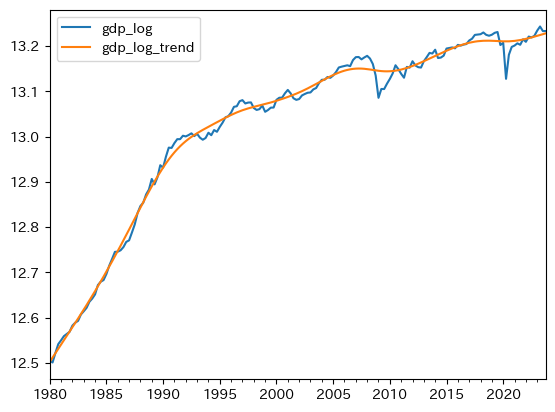

In [25]:
df.plot(y=['gdp_log', 'gdp_log_trend'])
pass

トレンドは直線ではなくスムーズな曲線となっている。上下に動く変数を平滑化したものがトレンドなので直線になるとは限らないのである。

次に景気循環の変数を作成するが，トレンドからの乖離を割合で表すために，上でも使った次の関係を利用する。

$$
\dfrac{Y_t-Y_t^{\text{trend}}}{Y_t^{\text{trend}}}
=\dfrac{Y_t}{Y_t^{\text{trend}}}-1
\approx\log\left(\frac{Y_t}{Y_t^{\text{trend}}}\right)
=\log(Y_t) - \log(Y_t^{\text{trend}})
$$ (eq:10-devaition)

In [26]:
df['gdp_cycle'] = 100 * ( df['gdp_log'] - df['gdp_log_trend'] )

`0`に横線を引いてプロットしてみよう。

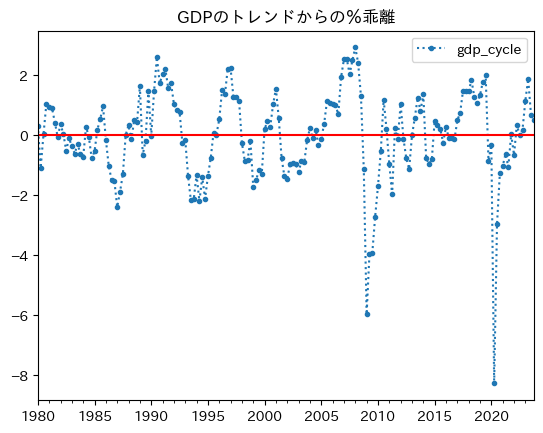

In [27]:
ax_ = df.plot(y='gdp_cycle',
              marker='.',       # 1
              linestyle=':',
              title='GDPのトレンドからの％乖離')
ax_.axhline(0, color='red')     # 2
pass

```{admonition} コード説明
:class: dropdown

1. `Pandas`のメソッド`plot`は図を表示すると共に図の「軸（axis）」を返すが，それを変数`ax`に割り当てている。
    * `marker`はデータのマーカーを指定する引数であり，`'.'`は小さな点を指定している。
    * `linestyle`は線のスタイルを指定する引数であり，`':'`は点線を指定している。
2. `ax_`のメソッド`.axhline()`を使うと横線を描くことができる。
    * 縦軸の値`0`は必須の引数
    * `color=red`は色を指定する引数（無くても良い）。
```

まず乖離率の平均を確認してみよう。

In [28]:
df['gdp_cycle'].mean()

2.4098904689977147e-11

正と負の乖離率は相殺し平均では`0`に非常に近い値となっている。

図を見ると、乖離率の絶対値は負の方が大きいことが分かる。絶対値で、負の乖離率は正の乖離率の何倍かを計算してみよう。

In [29]:
abs( df['gdp_cycle'].min() ) / df['gdp_cycle'].max()

2.8222940822480984

山よりも谷は`2`倍以上深いことが分かる。

負の乖離率の絶対値が大きく、平均は約`0`だということは、正の乖離率が発生した回数が多いということが分かる。確認してみよう。

In [30]:
cond = ( df['gdp_cycle'] >= 0 )
plus = len( df.loc[cond,:] )
minus = len(df) - plus
print(f'正の乖離の発生回数：{plus}\n負の乖離の発生回数：{minus}')

正の乖離の発生回数：90
負の乖離の発生回数：86


ヒストグラムを使って分布を確認してみよう。

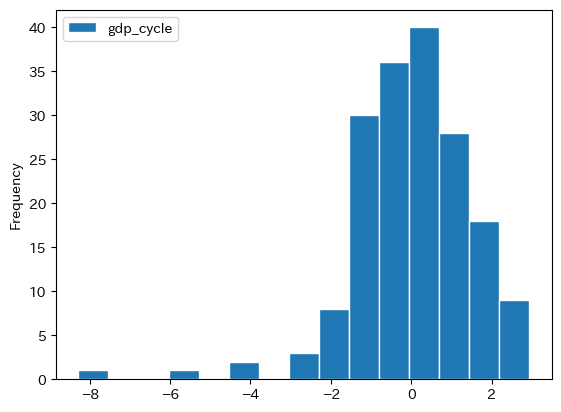

In [31]:
df.plot(y='gdp_cycle', kind='hist', ec='white', bins=15)
pass

歪んだ分布になっていることが分かる。

もう一度GDP乖離率のプロットを見てみよう。「山」と「谷」の形，幅（期間），高さ（深さ）はまちまちであり，不確実な要素が大きい。言い換えると，景気循環の予測は非常に難しい。この点は確率変数として捉えることができるが，このアプローチは後のトピックで扱う。

### 構成要素のトレンドからの乖離率

次にGDPの構成要素について考えるが，まずトレンドからの乖離の変数を作成する（単位：％）。

In [32]:
for v in gdp_lst[1:]:   # gdp以外の変数    
    
    df[v+'_cycle'] = 100 * ( df[v+'_log'] - df[v+'_log_trend'] ) 

図示する変数のリスを作成するために，列ラベルを確認しよう。

In [33]:
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'capital', 'employed', 'unemployed', 'unemployment_rate', 'hours',
       'total_hours', 'inflation', 'price', 'deflator', 'gdp_log',
       'gdp_growth_quarter', 'gdp_growth_annual', 'gdp_log_trend',
       'consumption_log', 'consumption_log_trend', 'investment_log',
       'investment_log_trend', 'government_log', 'government_log_trend',
       'exports_log', 'exports_log_trend', 'imports_log', 'imports_log_trend',
       'gdp_cycle', 'consumption_cycle', 'investment_cycle',
       'government_cycle', 'exports_cycle', 'imports_cycle'],
      dtype='object')

列ラベルに`_cycle`がついている変数だけを選ぶために`cycle_lst`を作成する。

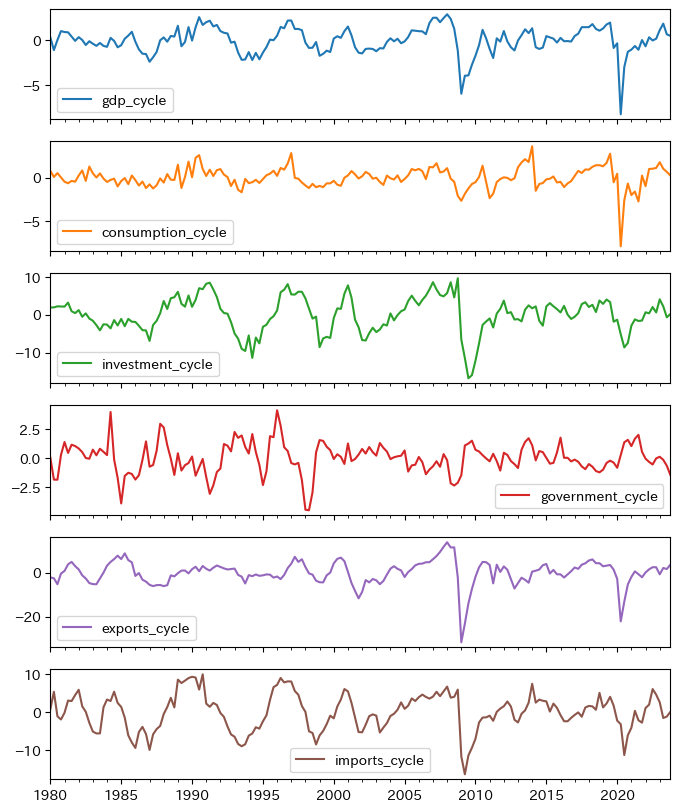

In [34]:
gdp_cycle_lst = df.columns[-6:]   # 最後の6変数
df.plot(y=gdp_cycle_lst, subplots=True, figsize=(8,10))
pass

この図に基づいて次の点について考える。
1. GDPと順循環的（pro-cyclical）か反循環的（counter- cyclical）かどうか
2. 持続性
1. 変動の大きさの比較

### インフレ率と失業率のトレンドからの乖離

次に、失業率とインフレ率の乖離を確認するが、GDPなどの変数と違い、インフレ率と失業率は長期的なトレンドはないと考えることができる。従って、式[](eq:10-decompose_plus_A)を使い、対数化せずに計算する必要がる。

In [35]:
for v in infu_lst:

    df[v+'_trend'] = py4macro.trend( df[v] )
    df[v+'_cycle'] = df[v] - df[v+'_trend']

まず両変数の乖離をプロットしてみよう。

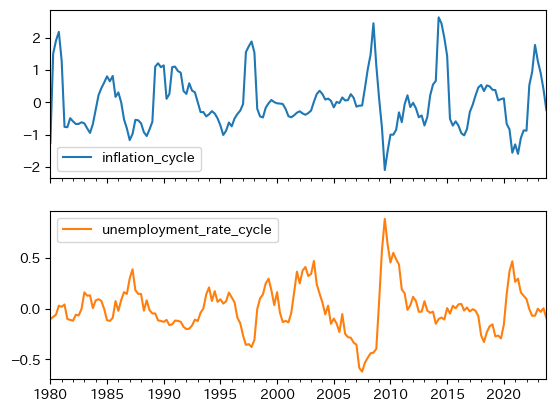

In [36]:
infu_cycle_lst = [v+'_cycle' for v in infu_lst]

df.plot(y=infu_cycle_lst, subplots=True)
pass

以下で考察するが、逆に動いているのが特徴的である。

## 変動の相関

ここでは変数の変動間の相関について考察する。
相関とは，異なる変数が同時にどの方向（正か負）にどの程度動く傾向にあるかを示す。

### 復習

`2`つのランダム変数$X_i$と$Y_i$, $i=1,2,3,\cdots,n$を考えよう。
`2`変数の**不偏分散**は次のように定義される。

$$
\sigma_{X}^2=\frac{1}{n-1}\sum_{i=1}^{n}
\left(X_i-\overline{X}\right)^2
\qquad
\sigma_{Y}^2=\frac{1}{n-1}\sum_{i=1}^{n}
\left(Y_i-\overline{Y}\right)^2
$$

ここで$\overline{X}$と$\overline{Y}$は平均を表し、それぞれの**標準偏差**は

$$
\sigma_{X},
\quad
\sigma_{Y}
$$

となる。

ここでは`2`変数の相関を考えたい訳だが、その尺度として共分散が使われ、次のように定義される。

$$
\sigma_{XY}=\frac{1}{n-1}\sum_{i=1}^{n}
\left(X_i-\overline{X}\right)\left(Y_i-\overline{Y}\right)
$$ (eq:10-covariance)

符号の解釈：
* $\sigma_{XY}=0$：無相関
* $\sigma_{XY}>0$：正の相関
* $\sigma_{XY}<0$：負の相関

共分散の絶対値が大きければ大きい（小さい）程，相関度が高い（低い）ことを意味する。

また上の定義から次が成立することが簡単に理解できる。

$$
\sigma_{XX}=\sigma_{X}^2,
\qquad
\sigma_{YY}=\sigma_{Y}^2,
$$

別々の`2`変数を使うことにより共分散を計算することができるが、その`2`変数が同じ変数となる場合（`X`と`X`の`2`変数もしくは`Y`と`Y`の`2`変数）は分散となる。

共分散の重要な特徴は$X_i$と$Y_i$の単位に依存することであり、それにより単位が異なる`2`つの相関度の比較には向いていない。
その点を克服するのが**相関係数**であり、次のように定義される。

$$
\rho_{XY}=
\frac{\sigma_{XY}}{\sigma_X\sigma_Y}
$$ (eq:10-covariance_coef)

次の特徴がある。
* 分母は必ず正となるので，分子の共分散が符号を決定する。
* $\rho_{XY}$の値は`-1`から`1`の間の値を取り、単位に依存しない。この特徴は、分母に$X$と$Y$の標準偏差の積を積を置く事により単位をキャンセルしているためである。

$\rho_{XX}$を考えてみよう。

$$
\rho_{XX}=
\frac{\sigma_{XX}}{\sigma_X\sigma_X}
=\frac{\sigma_{X}^2}{\sigma_X^2}
=1
$$

分母は`X`の分散と等しく，分母も`X`の分散と等しくなり、`1`となる。即ち、`X`と`X`は完璧に相関しているため相関係数は`1`となる。また，$X$と$-X$の相関係数は$\rho_{X-X}=-1$となり，完璧な負の相関となる。一般的には，$\rho_{XY}$の絶対値は`1`よりも小さな値となる。相関係数の重要な特徴は単位には依存しないため，単位が異なる変数の相関度を比較するには有用な指標となる。

### `.cov`と`.corr()`

`DataFrame`には分散と共分散を計算するメソッド`.cov()`が用意されている。例として、`gdp_cycle`と`consumption_cycle`を抽出して`.cov()`を使ってみよう。

In [37]:
varcov = df[['gdp_cycle', 'government_cycle']].cov()
varcov

,gdp_cycle,government_cycle
gdp_cycle,2.200185,-0.333983
government_cycle,-0.333983,1.735850


`varcov`は分散共分散行列と呼ばれる。
左上と右下の対角線上にあるのは、`gdp_cycle`と`government_cycle`の不偏分散である。
一方、右上と左下の値（同じ値となる）が**共分散**であり、この場合は負の値となっている。

`varcov`を使い相関係数を計算してみよう。

In [38]:
varcov.iloc[0,1] / ( varcov.iloc[0,0]**0.5 * varcov.iloc[1,1]**0.5 ) 

-0.1708985243868556

相関係数はメソッド`.corr()`を使って求めることもできる。

In [39]:
df[['gdp_cycle', 'government_cycle']].corr()

,gdp_cycle,government_cycle
gdp_cycle,1.000000,-0.170899
government_cycle,-0.170899,1.000000


左下もしくは右上の値が相関係数であり、上の「手計算」と等しい。

### GDPと構成要素との相関係数

GDPと構成要素との相関係数を`for`ループを使って計算しよう。

In [40]:
print('GDPの変動との相関係数\n------------------------')

for v in gdp_cycle_lst:
    corr = df[['gdp_cycle', v]].corr().iloc[0,1]  # 1
    print(f'{v:<19}{corr:>5.2f}')                 # 2

GDPの変動との相関係数
------------------------
gdp_cycle           1.00
consumption_cycle   0.77
investment_cycle    0.78
government_cycle   -0.17
exports_cycle       0.76
imports_cycle       0.65


```{admonition} コードの説明
:class: dropdown

1. `.corr()`は相関係数を計算するメソッドであり，2x2の行列を返す。
    * `iloc[0,1]`は相関係数の値を抽出している。`iloc[1,0]`でも同じ結果となる。
2. `f-string`を使っている。
    * `<19`は`v`の文字列の長さを空白を足して`19`にし左詰めにする。
    * `>5`は`corr`の文字列の長さを空白を足して`5`にし右詰めにする。
    * `.2f`は小数点第二位までの表示を設定している。
        * `>5`と`.2f`の順番を逆にするとエラーが発生する。
```

政府支出以外は全て相関係数は正の値であり，値も大きい。即ち，順循環的である（裏にあるメカニズムを考えてみよう）。下の図はGDPと投資の散布図であり，正の相関を確認できる。

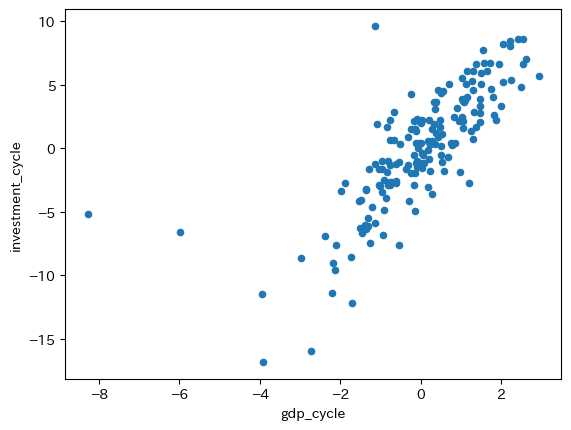

In [41]:
df.plot.scatter(x='gdp_cycle', y='investment_cycle')
pass

一方，政府支出の値は負であり，景気循環をコントロールしようとする政府の政策の現れと解釈できる。GDPのトレンドからの乖離が負の場合、景気対策として政府支出を増やし傾向にある。また、GDPの乖離が正であれば、経済のオーバーヒート（インフレの発生）を避けるために政府支出を減少させると理解できる。

一方、値が小さいのは，時間的なラグがあるためだと思われる。景気に関するデータを集計するには数ヶ月かかり，国会審議や支出の実行にも時間を取られることになる。この点を確認するために，`Series`のメソッド`.shift()`を使って相関係数を再計算してみよう。

In [42]:
print('  GDPとの相関係数\n-----------------------')

for n in range(12):
    
    df['gov_cycle_shift'] = df['government_cycle'].shift(-n)     #1
    
    corr = df[['gdp_cycle', 'gov_cycle_shift']].corr().iloc[0,1]
    
    print(f'{n:>3}期先の政府支出: {corr:>6.3f}')
    
    del df['gov_cycle_shift']                                    #2

  GDPとの相関係数
-----------------------
  0期先の政府支出: -0.171
  1期先の政府支出: -0.318
  2期先の政府支出: -0.392
  3期先の政府支出: -0.396
  4期先の政府支出: -0.327
  5期先の政府支出: -0.277
  6期先の政府支出: -0.149
  7期先の政府支出: -0.026
  8期先の政府支出:  0.074
  9期先の政府支出:  0.122
 10期先の政府支出:  0.126
 11期先の政府支出:  0.124


```{admonition} コードの説明
:class: dropdown

* `#1`：`.shift()`の引数は値を先に何期ずらすかを指定する。比べたいのは$t$期のGDPと$t+n$期の政府支出なので，後にずらす必要があるためマイナス符号を付けて`.shift(-t)`としている。
* `#2`：列`gov_cycle_shift`は必要ないので削除する。
```

GDPの乖離は`3`四半期先の政府支出との相関係数が最大となっている。景気循環に対する政府の姿勢が確認できる一方，政府の対応は長いの時間が掛かることを示す結果となっている。

### GDPとインフレ率・失業率との相関係数

GDP、インフレ率、失業率の3つの変数間の相関係数を計算してみよう。

In [43]:
cols = ['gdp_cycle'] + infu_cycle_lst
df[cols].corr()

,gdp_cycle,inflation_cycle,unemployment_rate_cycle
gdp_cycle,1.000000,0.347499,-0.625012
inflation_cycle,0.347499,1.000000,-0.550002
unemployment_rate_cycle,-0.625012,-0.550002,1.000000


右上数値と左下の数値は同じであり、次の読み方となる。
* `gdp_cycle`と`inflation_cycle`の相関係数
    * `0`行目・`1`列目の値もしくは`1`行目・`0`列目の値
    * 正の値：「景気が良くなるとインフレが発生する」という直観に沿った結果
* `gdp_cycle`と`unemployment_rate_cycle`の相関係数
    * `0`行目・`2`列目の値もしくは`2`行目・`0`列目の値
    * 負の値：「景気が良くなると失業率は減少する」という直観に沿った結果
* `inflation_cycle`と`unemployment_rate_cycle`の相関係数
    * `1`行目・`2`列目の値もしくは`2`行目・`1`列目の値
    * 負の値：フィリップス曲線を反映

GDPの乖離に反応する政府支出は時間的なラグが発生していた。
インフレ率はどうだろうか。
景気が良くなるとインフレ率は高くなることは確認できたが、景気の影響は直ぐに価格上昇に反映されるのだろうか。例えば、企業間の競争や顧客への影響を考え、企業の反応には時間的なラグがあるかも知れない。
失業率はどうだろうか。景気が良くなっても雇用を増やすのにはコスト（従業員募集の宣伝にかかる時間や費用）がかかり、雇用は直ぐに反応できないかも知れない。また、景気が悪くなったとしても、企業は簡単に労働者を解雇することができない場合も多く、雇用調整には時間が掛かるかも知れない。

このような時間的なラグを捉えるために，`for`ループを使い時間をずらして相関係数を再計算してみよう。

In [44]:
print('  GDPとの相関係数\n-----------------------')

for n in range(0,10):
    
    df['inflation_cycle_shift'] = df['inflation_cycle'].shift(-n)
    
    corr = df[['gdp_cycle', 'inflation_cycle_shift']].corr().iloc[0,1]
    
    print(f'{n:>3}期先のインフレ率: {corr:>6.3f}')
    
    del df['inflation_cycle_shift']

  GDPとの相関係数
-----------------------
  0期先のインフレ率:  0.347
  1期先のインフレ率:  0.455
  2期先のインフレ率:  0.515
  3期先のインフレ率:  0.480
  4期先のインフレ率:  0.439
  5期先のインフレ率:  0.285
  6期先のインフレ率:  0.153
  7期先のインフレ率:  0.038
  8期先のインフレ率: -0.115
  9期先のインフレ率: -0.211


GDPとインフレ率の相関係数は`2`期先で最高になり、影響は`7`期先で`0`に近づいている。

In [45]:
print('  GDPとの相関係数\n-----------------------')

for n in range(10):
    
    df['unemployment_rate_cycle_shift'] = df['unemployment_rate_cycle'].shift(-n)
    
    corr = df[['gdp_cycle', 'unemployment_rate_cycle_shift']].corr().iloc[0,1]
    
    print(f'{n:>3}期先の失業率: {corr:>6.3f}')
    
    del df['unemployment_rate_cycle_shift']

  GDPとの相関係数
-----------------------
  0期先の失業率: -0.625
  1期先の失業率: -0.756
  2期先の失業率: -0.761
  3期先の失業率: -0.638
  4期先の失業率: -0.496
  5期先の失業率: -0.305
  6期先の失業率: -0.158
  7期先の失業率: -0.031
  8期先の失業率:  0.109
  9期先の失業率:  0.225


インフレ率と同様に、インパクトには時間的なラグがあり、`2`期先で最高になっている。また、符号が変わるのは`8`期先であり、影響は長く続くことがわかる。

(sec:10-autocovariance)=
## 変動の自己相関

次に，変数の変動の自己相関について考える。
自己相関とは，ある変数が，その過去の値によってどの方向（正か負）にどの程度影響を受けるかを示す。

### 復習

既出のランダム変数$X_i$と$Y_i$、$i=1,2,3,\cdots,n$を使い，自己相関について説明する。。
`2`変数の相関度を測る共分散$\sigma_{XY}$は式[](eq:10-covariance)で定義され，相関係数$\rho_{XY}$は式[](eq:10-covariance_coef)で与えられる。

ここで時系列のランダム変数を$\varepsilon_t$として、次の置き換えてみよう。
* $X_i\;\Rightarrow\;\varepsilon_t,\quad t=0,1,2,3,\cdots$
* $Y_i\;\Rightarrow\;\varepsilon_{t-s},\quad s=1,2,3,\cdots$

$\varepsilon_{t-s}$は`s`期遡る過去の値である。
これにより分散は次のように置き換えることができる。

$$
\begin{aligned}
\sigma_X^2&\quad\Rightarrow\quad\sigma_{\varepsilon_t}^2\\
\sigma_Y^2&\quad\Rightarrow\quad\sigma_{\varepsilon_{t-s}}^2
\end{aligned}
$$

$X_i$と$Y_i$の分散は，`s`期ずれているだけの同じランダム変数$\varepsilon$の分散に置き換わっている。
更に，共分散は次のように置き換える事ができる。

$$
X_i\text{と}Y_i\text{の共分散}=\sigma_{XY}
\quad\Rightarrow\quad
\sigma_{\varepsilon_t,\varepsilon_{t-s}}
=s\text{期間離れた}\varepsilon\text{の自己共分散}
$$

即ち，自己共分散はランダム変数とその変数の`s`期前の値との**自己相関**の度合を示す指標ということになる。

これらの結果を使うと，$\varepsilon_t$の相関係数は

$$
\rho_{\varepsilon}(s)
\equiv
\rho_{\varepsilon_t,\varepsilon_{t-s}}
=\frac{
    \sigma_{\varepsilon_t,\varepsilon_{t-s}}
    }{
    \sigma_{\varepsilon_t}
    \sigma_{\varepsilon_{t-s}}
    }
$$

で与えられ，一般的には**自己相関関数**と呼ばれる。「関数」と呼ばれる理由は，$\rho_{\varepsilon}(s)$は`s`の関数として考えることができるためだ。このサイトでは，`s=1`の場合は自己相関係数と呼ぶ事にする。呼称よりも重要なのが解釈である。解釈は次のようになる。
* $\rho_{\varepsilon}(s)=0,\;s=1,2,3,\cdots$：何期離れたとしても自己相関はなしという意味である。過去の影響は皆無の状況を指している。
* $\rho_{\varepsilon}(s)>0,\;s=1,2,3,\cdots$：今期と`s`期前の値は正の相関があるということを示す。$\varepsilon_{t-s}$の値が大きければ（小さければ），$\varepsilon_{t}$も大きい（小さい）傾向にあるという意味であり，`s`期前の影響が強ければ，自己相関係数の絶対値は大きくなる。経済学では`s=1`を考える場合が多く，この性質を**持続性**（persisitence）と呼ぶ。持続性は多くのマクロ変数の重要な特徴となっている。
* $\rho_{\varepsilon}(s)<0,\;s=1,2,3,\cdots$：今期と`s`期前の値は負の相関があるということを示す。$\varepsilon_{t-s}$の値が大きければ（小さければ），$\varepsilon_{t}$は小さい（大きい）傾向にあるという意味であり，`s`期前の影響が強ければ，自己相関係数の絶対値は大きくなる。

### `.cov`と`.corr()`と`.autocorr()`：GDPの場合

まずGDPの変動を考えるために，`df`から`gdp_cycle`を`DataFrame`として抽出し，変数`g`に割り当てよう。

In [46]:
g = df[['gdp_cycle']]

次に，`1`期違いの自己共分散$\sigma_{g_tg_{t-1}}$を計算するために，`g`の列`gdp_cycle`を`1`期シフトさせた新たな列`gdp_cycle_lag`を作成しよう。

In [47]:
g['gdp_cycle_lag'] = g['gdp_cycle'].shift()
g.head()

,gdp_cycle,gdp_cycle_lag
,,
1980-01-01,0.326920,NaN
1980-04-01,-1.084502,0.326920
1980-07-01,0.045698,-1.084502
1980-10-01,1.046795,0.045698
1981-01-01,0.944113,1.046795


`gdp_cycle_lag`の値は`gdp_cycle`の値が`1`期シフトしていることが分かる。
`0`番目の行の`gdp_cycle`が初期値であり、同じ値が`1`番目の行の`gdp_cycle_lag`に入っている。
即ち、`1`番目の行を見ると`gdp_cycle`には`1`期の値、`gdp_cycle_lag`には初期（`0`期）の値がある。
同様に、各行の`gdp_cycle`には`t`期の値、`gdp_cycle_lag`には`t-1`期の値が入っている。

メソッド`.cov()`を使って分散・自己共分散を計算してみよう。

In [48]:
g.cov()

,gdp_cycle,gdp_cycle_lag
gdp_cycle,2.200185,1.542588
gdp_cycle_lag,1.542588,2.211296


左上と右下の対角線上にあるのは、`gdp_cycle`と`gdp_cycle_lag`の不偏分散である。近い値だが、`gdp_cycle_lag`には欠損値があるため異なる値となっている。一方、右上と左下の値（同じ値となる）が**自己共分散**である。

`g.cov()`を使って自己相関係数を計算することができるが、一点注意する必要がある。`g`の`0`行目には欠損値があるため、自己共分散を計算する際にその行は使われていない。同様に、自己相関係数を計算する際は欠損値がある行を使わずに計算する必要がある。この点に注意し、次のコードで計算することができる。

In [49]:
varcov = g.dropna().cov()
varcov.iloc[0,1] / ( varcov.iloc[0,0]**0.5 * varcov.iloc[1,1]**0.5 )

0.6974503788764269

メソッド`.corr()`を使っても同じ結果を得ることができる。

In [50]:
g.corr()

,gdp_cycle,gdp_cycle_lag
gdp_cycle,1.00000,0.69745
gdp_cycle_lag,0.69745,1.00000


また、`g['gdp_cycle']`のメソッド`.autocorr()`を使い、直接**自己相関係数**を計算することも可能である。

In [51]:
g['gdp_cycle'].autocorr()

0.6974503788764269

この数値は持続性を意味し，今期のGDPのトレンドからの乖離が正（負）であれば、来季もそれが続く傾向にあることを意味する。

`g`を使って散布図を描いてみよう。

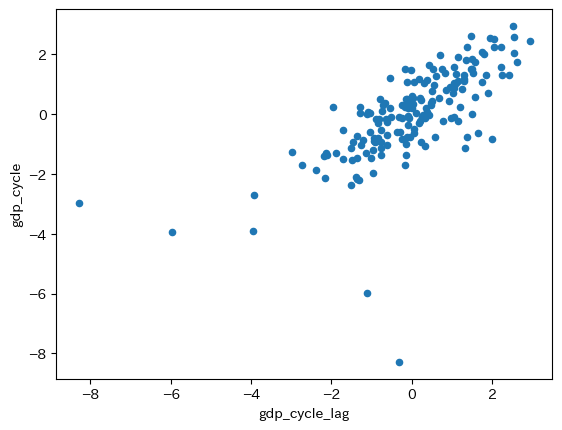

In [52]:
g.plot.scatter(x='gdp_cycle_lag', y='gdp_cycle')
pass

はっきりと正の相関を確認できるが，例外的な動きをしている観測値もある。

### GDPの構成要素

まずGDPの構成要素のトレンドからの乖離率の持続性を考察するが，`gdp_cycle`を含めて次の変数を考えよう。

In [53]:
gdp_cycle_lst

Index(['gdp_cycle', 'consumption_cycle', 'investment_cycle',
       'government_cycle', 'exports_cycle', 'imports_cycle'],
      dtype='object')

`for`ループを使い、自己相関係数を計算してみよう。

In [54]:
for v in gdp_cycle_lst:
    
    autocorr = df[v].autocorr()       #1
    print(f'{v:<19}{autocorr:.3f}')   #2

gdp_cycle          0.697
consumption_cycle  0.489
investment_cycle   0.836
government_cycle   0.641
exports_cycle      0.749
imports_cycle      0.821


```{admonision} コードの説明
* `#1`：`.autocorr()`は自己相関係数を計算するメソッド。
* `#2`：f-stringを使っている。
    * `<19`は`v`の文字列の長さを空白を足して`19`にし左詰めにする。
    * `.3f`は小数点第３位までの表示を設定している。
```

消費を除いて全て0.5以上であり，全ての変数で持続性が確認できる。
特に、投資と輸入の持続性は高いことが分かる。

### インフレ率と失業率

次に、失業率とインフレ率の持続性を確認する。

In [55]:
for v in infu_cycle_lst:
    
    autocorr = df[v].autocorr()
    print(f'{v:<25}{autocorr:.3f}')

inflation_cycle          0.790
unemployment_rate_cycle  0.875


非常に強い持続性が確認できる。一旦、インフレ率と失業率が長期的なトレンドから乖離すると、元に戻るには時間が掛かることを意味している。更には、財政政策と金融政策によるマクロ経済政策の効果が現れてくるには時間が掛かることを示唆しているおり、経済安定化政策の難しさを示唆する数値となっている。

## 変動の大きさ

次に変動の大きさを考えるために，GDPの標準偏差に対するそれぞれの構成要素の標準偏差の比率を計算しよう。

In [56]:
for v in gdp_cycle_lst:
    
    var = df[v].std() / df['gdp_cycle'].std()
    print(f'{v:<19}{var:>5.2f}')

gdp_cycle           1.00
consumption_cycle   0.81
investment_cycle    3.15
government_cycle    0.89
exports_cycle       3.76
imports_cycle       3.26


投資，輸出，輸入の値はGDPの3倍以上であり，政府支出の値はGDPより低く，消費の変動は更に小さい。これは消費者の不確実性を嫌う姿勢が反映されていると解釈できる。GDPの構成要素を対GDP比率で検討した際，消費は投資よりも比率が大きかったことを思い出そう。変動に関しては，順位が逆転し投資が大きく上回っている。この点を図示して視覚的に確認してみよう。

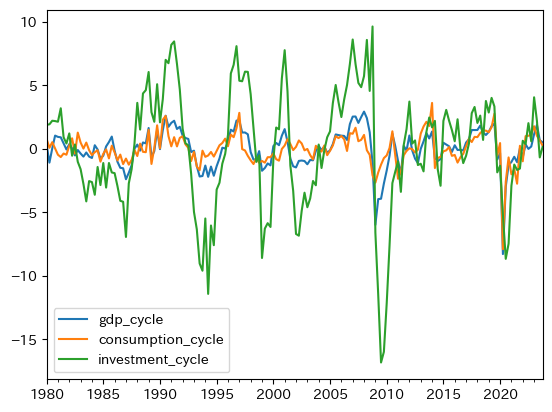

In [57]:
df.plot(y=gdp_cycle_lst[:3])
pass

これらの結果を説明するために，効用最大化に基づく消費者理論があり，利潤最大化に基づく企業行動に関するモデルが使われている。

```{note}
変動の大きさを比べるために、変動係数を使うこともできるが、分母に使う平均が`0`に近い値となるため、意味がない比較となってします。
```

次に、インフレ率と失業率の変動の大きさをプロットしてみよう。

In [58]:
df['inflation_cycle'].std() / df['unemployment_rate_cycle'].std()

3.6695764937220288

インフレ率の変動の標準偏差は、失業率のそれの`3`倍以上であり、非常に大きいことがわかる。
プロットして確かめてみよう。

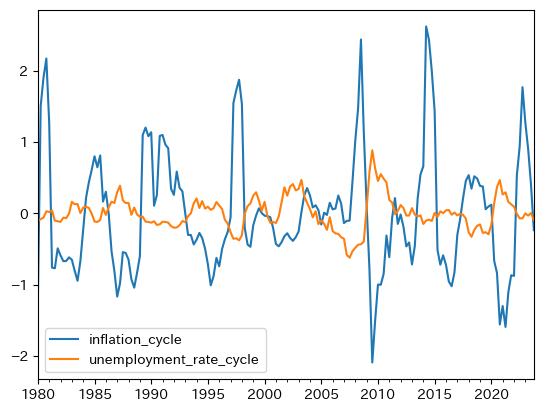

In [59]:
df.plot(y=infu_cycle_lst)
pass

大きな差を視覚的に確認できる。